# Chapter 4 --> Training Model

In [1]:
import numpy as np

In [2]:
np.random.seed(42)  # to make this code example reproducible
X = 2 * np.random.rand(100, 1)  # set x as 100*1 matrix
y = 4 + 3 * X + np.random.randn(100, 1)  # also y is 100*1 number based on X values 
# we assumed theta0 4 and theta 1 is 3

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100, 1)

In [5]:
print(X)
print('\n')
print(y)

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [0.39

In [6]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y ## finding best thetas using normal  equation 

## A @ B = np.matmul(A,B)


In [7]:
theta_best # two parameters because we have X0=1 and X1 of the matrix  

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new=np.array([[0],[2]]) ## has two  examples [0] [1] without dummy 
X_new_b=add_dummy_feature(X_new)
print("before adding dummy ")
print(X_new)
print("after adding dummy ")
print(X_new_b)

before adding dummy 
[[0]
 [2]]
after adding dummy 
[[1. 0.]
 [1. 2.]]


In [9]:
y_predict = np.matmul(X_new_b,theta_best) ### X_new @ theta
y_predict

array([[4.21509616],
       [9.75532293]])

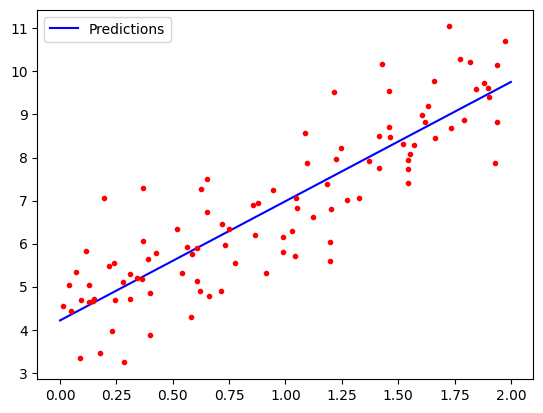

In [10]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "b-", label="Predictions")
plt.plot(X, y, "r.")
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X,y) ## Scikit-learn automatically adds that dummy dimension (instead of using X_b)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
model1.intercept_ ## theta 0

array([4.21509616])

In [13]:
model1.coef_  ## other coefficeint 

array([[2.77011339]])

In [14]:
model1.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [15]:
# method 1 to calc theta using SVD
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [16]:
## method 2 to calculate the theta using SVD 
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

### Gradient Descent Update Rule

For each parameter \( \theta_j \), the update rule is:

\[
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
\]


Where:
- \( \theta_j \) is the \( j \)-th parameter (weight).
- \( \eta \) is the learning rate.
- \( J(\theta) \) is the cost function (e.g., MSE).
- \( \frac{\partial J(\theta)}{\partial \theta_j} \) is the partial derivative of the cost function with respect to \( \theta_j \).


In [17]:
## GD
eta=0.1 ## learning rate
np.random.seed(42)
theta=np.random.randn(2,1)
m=len(X_b)
for epoch in range(0,1000):
    gradient=2 / m * X_b.T @ (X_b @ theta - y)
    theta=theta-eta * gradient
    
theta


array([[4.21509616],
       [2.77011339]])

In [18]:
## SGD
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        ### picking random examples from training data
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targetsa

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [21]:
sgd_reg.intercept_[0] ,sgd_reg.coef_[0]

(np.float64(4.212788123101455), np.float64(2.7727026665805843))

 ### Polynomial Regression  178

In [22]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [23]:
import matplotlib.pyplot as plt



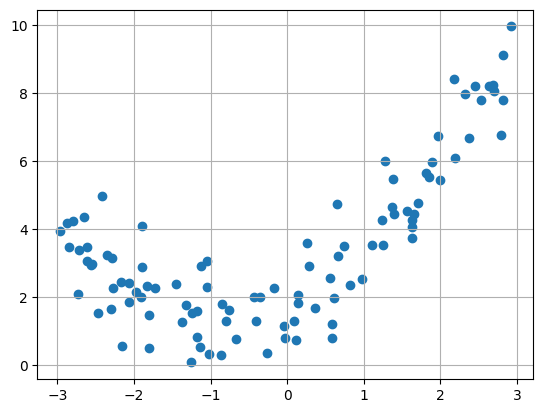

In [24]:
plt.scatter(X,y)
plt.grid()
plt.show()

In [25]:
# PolynomialFeatures takes x and return from x to x^n  where n is degree we want 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) ## return x and x^2
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

#### model underfitting

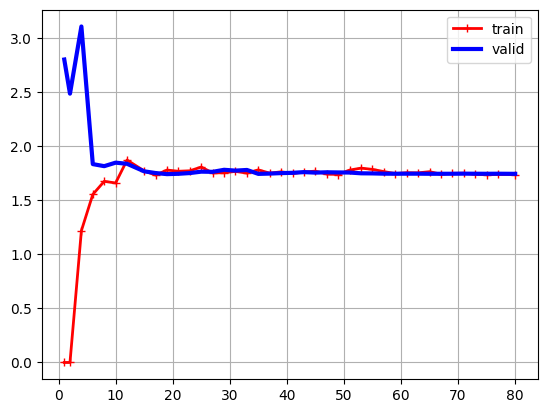

In [27]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.show()

#### unerfitting overcome using more complex model 

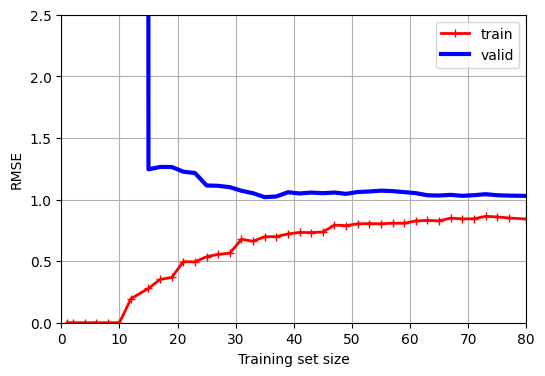

In [28]:
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False),LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve(
polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

#### Regularized Linear Models p183

## 1- Ridge Regression
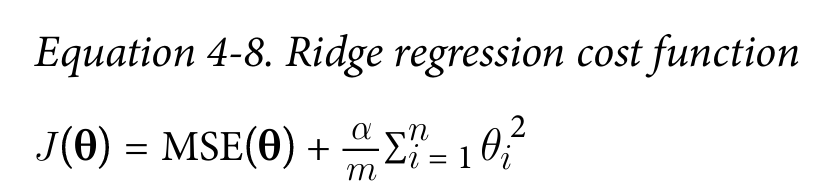

In [29]:
## first method for ridge regression  θ =( X.⊺X + αA )−1  .X⊺. y
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [30]:
## second method for ridge regression 
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])


array([4.82830117])

## 2-  Lasso Regression
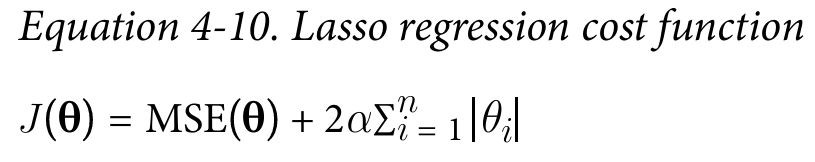

In [31]:
from sklearn.linear_model import Lasso  #Lasso is a regression method because it uses a linear regression approach with L1 regularization.
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

## 3- Elastic  Net regression

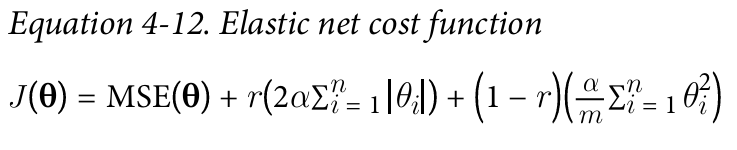

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

## Early Stopping

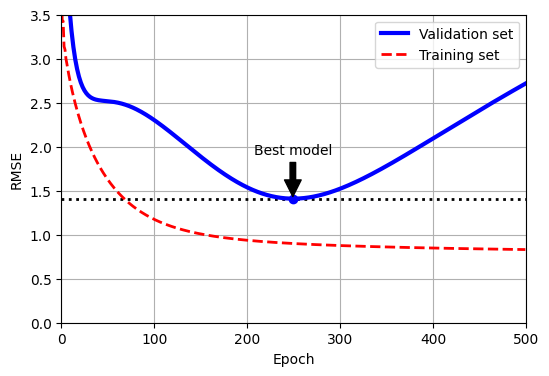

In [33]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

In [38]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [40]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [43]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [45]:
logReg=LogisticRegression(random_state=42)
logReg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = logReg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

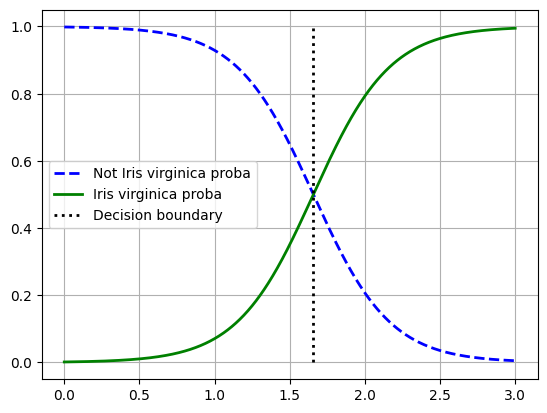

In [48]:
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
label="Decision boundary")
[...] # beautify the figure: add grid, labels, axis, legend, arrows, and samples
plt.legend()
plt.grid()
plt.show()

In [49]:
decision_boundary

np.float64(1.6576576576576576)